# Learning and practicing NumPy with examples and exercises

### 3.1 Indexing Arrays in NumPy




1. Given the NumPy array `arr = np.array([3, 7, 1, 9, 5])`, perform the following indexing operations:

   a) Retrieve the third element of the array.  
   b) Slice the array to get elements from index 1 to index 3.  
   c) Change the value of the fourth element to 12.

In [4]:
import numpy as np
arr = np.array([3, 7, 1, 9, 5])
print(f"a) {arr[2]}\nb) {arr[1:4]}")
arr[3] = 12
print(f"c) {arr}")


a) 1
b) [7 1 9]
c) [ 3  7  1 12  5]


2. Create a 2D NumPy array (matrix) with the following values:

$$\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}$$

a) Retrieve the element in the second row and third column.  
b) Slice the matrix to get the submatrix consisting of the first two rows and all columns.


### 3.2 Indexing and Slicing Higher-Dimensional Tensors

Consider the following 3D tensor representing a stack of matrices:

$$
\begin{bmatrix}
\begin{bmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12
\end{bmatrix}, \\\\
\begin{bmatrix}
13 & 14 & 15 & 16 \\
17 & 18 & 19 & 20 \\
21 & 22 & 23 & 24
\end{bmatrix}, \\\\
\begin{bmatrix}
25 & 26 & 27 & 28 \\
29 & 30 & 31 & 32 \\
33 & 34 & 35 & 36
\end{bmatrix}
\end{bmatrix}
$$

Operations:

1. Retrieve the element at the position `(1, 0, 2)` within the tensor.  
2. Slice the tensor to obtain the 3×4 sub-tensor that corresponds to the second "matrix" (slice) along the first dimension.  
3. Slice the tensor to obtain the 2×4 sub-tensor that corresponds to the **last row** of the last two "matrices."  
4. Retrieve the element at the position `(2, 1, 3)` within the tensor.  
5. Slice the tensor to obtain the 2×4 sub-tensor that corresponds to the **first row** of the last two "matrices."


In [20]:
tensor = np.array(range(1,37)).reshape(3,3,4)
print(f"1) Element (1, 0, 2): {tensor[1,0,2]} \n")
print(f"2) Subtensor: \n {tensor[1]} \n")
print(f"3) Subtensor: \n {tensor[1:3,2,:]}\n")
print(f"4) Element (2, 1, 3): {tensor[2,1,3]}\n")
print(f"5) Subtensor: \n {tensor[1:3,0, :]}")


1) Element (1, 0, 2): 15 

2) Subtensor: 
 [[13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]] 

3) Subtensor: 
 [[21 22 23 24]
 [33 34 35 36]]

4) Element (2, 1, 3): 32

5) Subtensor: 
 [[13 14 15 16]
 [25 26 27 28]]


### 3.3 Defining Functions in Python



1. Write a Python function `calculate_average` that takes a list of numbers as input and returns the average of those numbers.

In [ ]:
def calculate_average(nums: list) -> float:
    arr = np.array(nums)
    return np.mean(arr)
numbers = list(range(1,11))
print(f"Average of {calculate_average(numbers)}")

2. Define a function `find_power` that calculates the result of a number raised to a given exponent. The function should have two parameters:
   - `base` (the base number)
   - `exponent` (default value should be 2)

In [ ]:
def find_power(base, exponent=2):
    return np.pow(base, exponent)
print(find_power(2))

### 3.4 Implementing Gradient Descent Optimization



1. Consider the linear regression problem where you have the following data points:

$$ X = [1, 2, 3, 4, 5] $$  
$$ y = [3, 6, 8, 11, 13] $$

 - Implement a Python program using NumPy to perform **gradient descent optimization** to find the parameters $ \theta_0 $ and $ \theta_1 $ for the linear regression model: $h_\theta(x) = \theta_0 + \theta_1 x$. Use a learning rate of **0.01** and iterate for **1000 steps**.



Shape of X: (5, 2) 
Shape of y: (5, 1)
Iteration 0: theta = [0.0082 0.0296], Error = 39.9
Iteration 200: theta = [0.6298716  2.27312682], Error = 0.3713108787517324
Iteration 400: theta = [0.68759398 2.48064809], Error = 0.03292565118795941
Iteration 600: theta = [0.69313136 2.49979407], Error = 0.03002865516983434
Iteration 800: theta = [0.6938339  2.50151283], Error = 0.030003619398593105
Después de 1000 iteraciones:
theta0 = 0.6941
theta1 = 2.5016


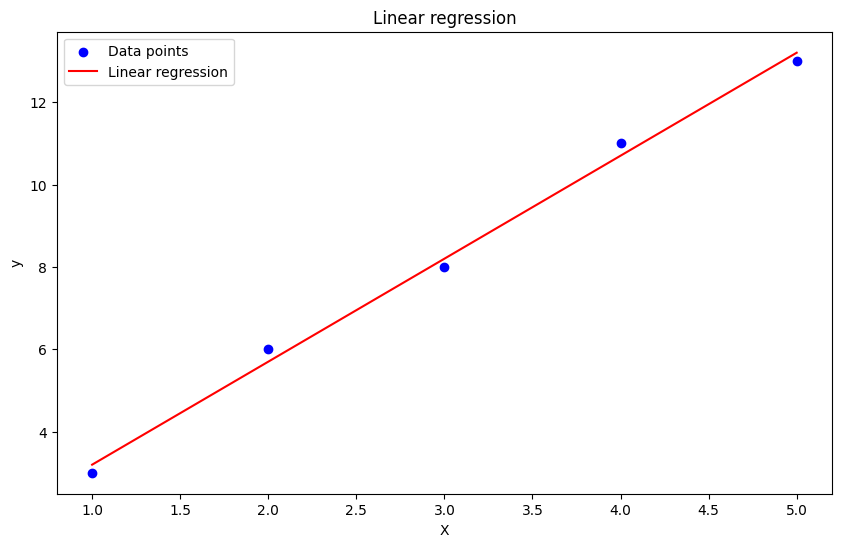

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([3,6,8,11,13]).reshape(-1,1)

#Bias term
X = np.c_[np.ones(X.shape[0]), X]

print(f"Shape of X: {X.shape} \nShape of y: {y.shape}")

theta = np.array([0.0, 0.0]).reshape(2,1)
alpha = 0.001
iterations = 1000


def cost_function(X, y, theta):
    m = len(y)
    error = ((X @ theta - y).T @ (X @ theta - y)).item() / (2* m)
    return error

def gradient_descent(X, y, theta, alpha, iterations):
    theta_history = []
    error_history = []
    m = len(y)
    for i in range(iterations):
        error = cost_function(X, y, theta)
        theta_history.append(theta.flatten())
        error_history.append(error)

        grad = (1/m) * X.T @ (X @ theta - y)
        theta = theta - alpha * grad

        if i % 200 == 0:
            print(f"Iteration {i}: theta = {theta.flatten()}, Error = {error}")

    return theta, error, theta_history, error_history

theta, _, theta_history, error_history  = gradient_descent(X, y, theta, alpha, iterations)


# Results
print(f"Después de {iterations} iteraciones:")
print(f"theta0 = {theta[0, 0]:.4f}")
print(f"theta1 = {theta[1, 0]:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue', label='Data points')
plt.plot(X[:, 1], X @ theta, color='red', label='Linear regression')
plt.title('Linear regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()



2. Draw in a plot the progress of the $ \theta_0 $ and $ \theta_1 $ parameters through the steps.

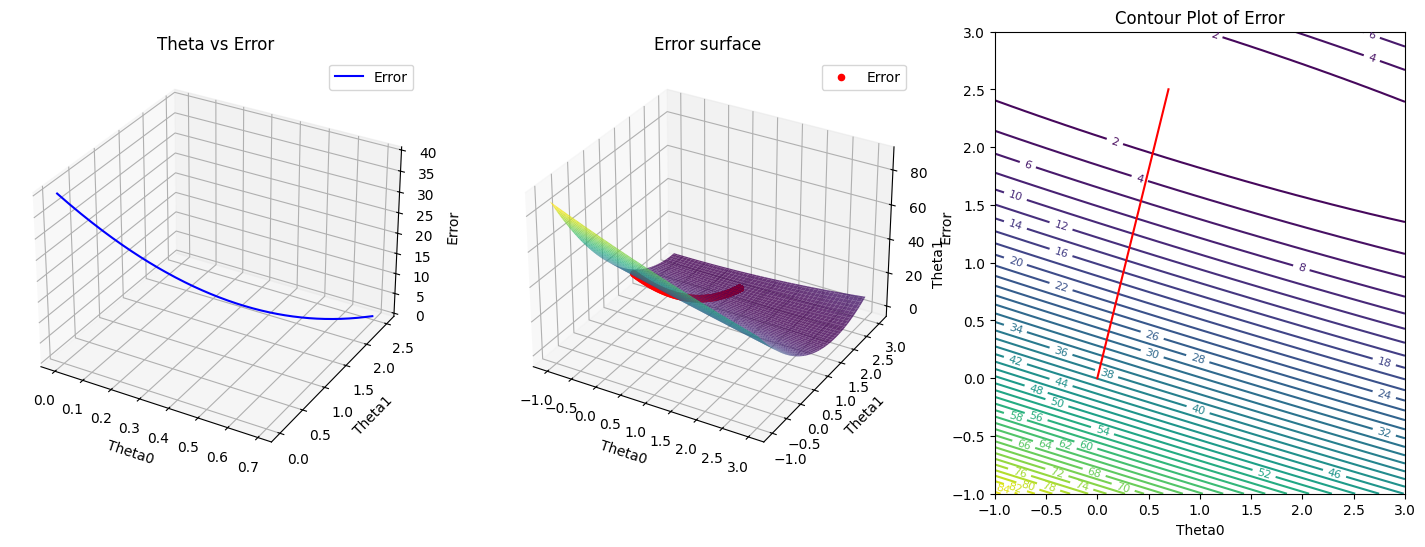

In [ ]:

theta_history = np.array(theta_history)

theta0_vals = np.linspace(-1, 3, 100)
theta1_vals = np.linspace(-1, 3, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

error_grid = np.zeros_like(theta0_grid)
m = len(y)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta_temp = np.array([theta0_grid[i, j], theta1_grid[i, j]]).reshape(2, 1)
        error_grid[i, j] = ((X @ theta_temp - y).T @ (X @ theta_temp - y)).item() / (2 * m)

# Crear el subplot 1x3
fig = plt.figure(figsize=(18, 6))

# Theta vs Error
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(theta_history[:, 0], theta_history[:, 1], error_history, label='Error', color='blue')
ax1.set_title('Theta vs Error', fontsize=12)
ax1.set_xlabel('Theta0', fontsize=10)
ax1.set_ylabel('Theta1', fontsize=10)
ax1.set_zlabel('Error', fontsize=10)
ax1.legend()

# Error surface 
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(theta0_grid, theta1_grid, error_grid, cmap='viridis', alpha=0.8)
ax2.scatter(theta_history[:, 0], theta_history[:, 1], error_history, color='red', label='Error')
ax2.set_title('Error surface', fontsize=12)
ax2.set_xlabel('Theta0', fontsize=10)
ax2.set_ylabel('Theta1', fontsize=10)
ax2.set_zlabel('Error', fontsize=10)
ax2.legend()

# Contour Plot
ax3 = fig.add_subplot(133)
cs = ax3.contour(theta0_grid, theta1_grid, error_grid, levels=50)
ax3.plot(theta_history[:, 0], theta_history[:, 1], color='red')
ax3.clabel(cs, inline=True, fontsize=8)
ax3.set_title('Contour Plot of Error', fontsize=12)
ax3.set_xlabel('Theta0', fontsize=10)
ax3.set_ylabel('Theta1', fontsize=10)

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

3. Explain in your own words the purpose of the learning rate in gradient
 descent optimization.

 Answer: The learning rate is a hyperparameter that controls how big the steps are when updating the model’s parameters during training. If the learning rate is too small, training will take a long time because the model moves slowly toward the minimum of the loss function. But if it's too large, the model might overshoot the minimum, bounce around it, or even fail to converge at all. All of this directly affects the computational cost — slower convergence means more training time, while instability can lead to wasted resources and the need to restart or fine-tune the process.